In [1]:
import numpy as np
import keras
import tensorflow as tf
from keras import layers
from keras import models
from keras.datasets import mnist

In [2]:
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 [==============================] - 1s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1),
          padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [4]:
history=model.fit(X_train, Y_train, batch_size=128,
                  epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
469/469 [==============================] - 43s 87ms/step - loss: 0.2937 - accuracy: 0.9135 - val_loss: 0.0893 - val_accuracy: 0.9722
Epoch 2/30
469/469 [==============================] - 48s 101ms/step - loss: 0.1131 - accuracy: 0.9676 - val_loss: 0.0626 - val_accuracy: 0.9800
Epoch 3/30
469/469 [==============================] - 42s 89ms/step - loss: 0.0785 - accuracy: 0.9768 - val_loss: 0.0556 - val_accuracy: 0.9824
Epoch 4/30
469/469 [==============================] - 40s 86ms/step - loss: 0.0633 - accuracy: 0.9804 - val_loss: 0.0468 - val_accuracy: 0.9847
Epoch 5/30
469/469 [==============================] - 39s 83ms/step - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0473 - val_accuracy: 0.9851
Epoch 6/30
469/469 [==============================] - 39s 83ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0497 - val_accuracy: 0.9847
Epoch 7/30
469/469 [==============================] - 39s 84ms/step - loss: 0.0395 - accuracy: 0.9869 - val_loss: 0.0447 - val_accuracy

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [6]:
test_scores = model.evaluate(X_test, Y_test, verbose=2)
loss_cnn = test_scores[0]*100
accuracy_cnn =  test_scores[1]*100
print('Test loss:', loss_cnn)
print('Test accuracy:', accuracy_cnn)

313/313 - 2s - loss: 0.0684 - accuracy: 0.9865 - 2s/epoch - 7ms/step
Test loss: 6.8432629108428955
Test accuracy: 98.65000247955322


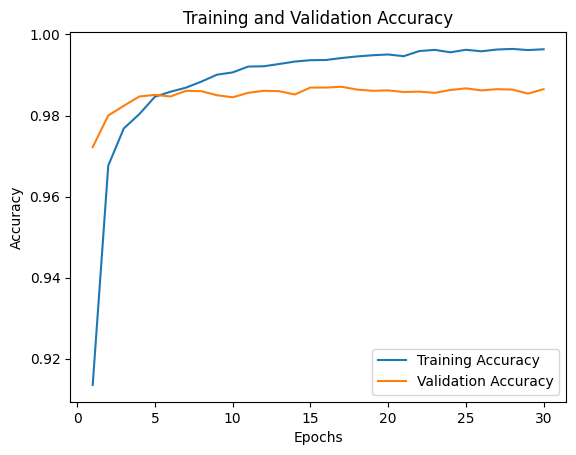

In [7]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

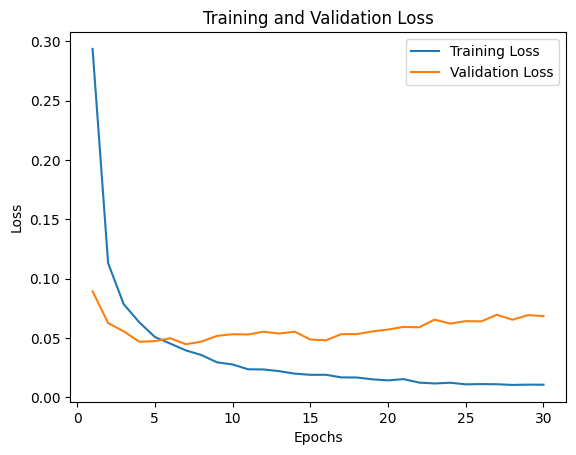

In [8]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()